# Ford car price predction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
car = pd.read_csv("ford.csv")

In [3]:
car.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [4]:
new_column_order = ['model','year','transmission','mileage','fuelType','tax','mpg','engineSize','price']
df = car[new_column_order]

In [5]:
df.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,Fiesta,2017,Automatic,15944,Petrol,150,57.7,1.0,12000
1,Focus,2018,Manual,9083,Petrol,150,57.7,1.0,14000
2,Focus,2017,Manual,12456,Petrol,150,57.7,1.0,13000
3,Fiesta,2019,Manual,10460,Petrol,145,40.3,1.5,17500
4,Fiesta,2019,Automatic,1482,Petrol,145,48.7,1.0,16500


In [6]:
df = df[df['year'] != 2060]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17965 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17965 non-null  object 
 1   year          17965 non-null  int64  
 2   transmission  17965 non-null  object 
 3   mileage       17965 non-null  int64  
 4   fuelType      17965 non-null  object 
 5   tax           17965 non-null  int64  
 6   mpg           17965 non-null  float64
 7   engineSize    17965 non-null  float64
 8   price         17965 non-null  int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 1.4+ MB


In [8]:
df.describe()

,year,mileage,tax,mpg,engineSize,price
count,17965.000000,17965.000000,17965.000000,17965.000000,17965.000000,17965.000000
mean,2016.864069,23360.858447,113.324353,57.907821,1.350804,12279.856833
std,2.024978,19471.182902,62.010410,10.125350,0.432379,4741.279186
min,1996.000000,1.000000,0.000000,20.800000,0.000000,495.000000
25%,2016.000000,9987.000000,30.000000,52.300000,1.000000,8999.000000
50%,2017.000000,18242.000000,145.000000,58.900000,1.200000,11291.000000
75%,2018.000000,31048.000000,145.000000,65.700000,1.500000,15299.000000
max,2020.000000,177644.000000,580.000000,201.800000,5.000000,54995.000000


In [9]:
df.isnull().sum()

model           0
year            0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
price           0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(154)

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.shape

(17811, 9)

# EDA

<Axes: xlabel='price', ylabel='Count'>

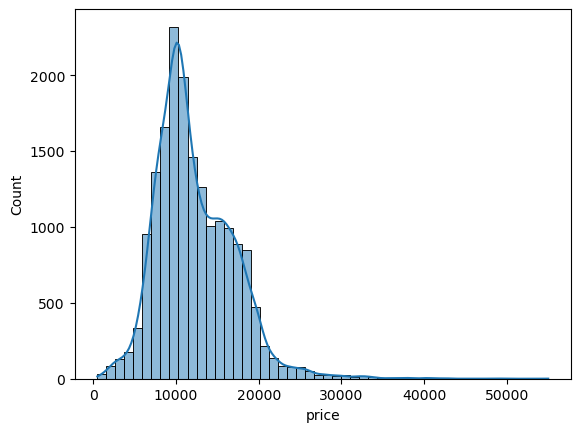

In [13]:
sns.histplot(df['price'],kde=True,bins=50)

<Axes: >

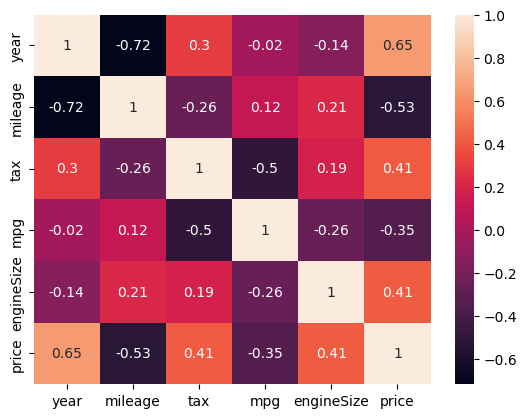

In [14]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

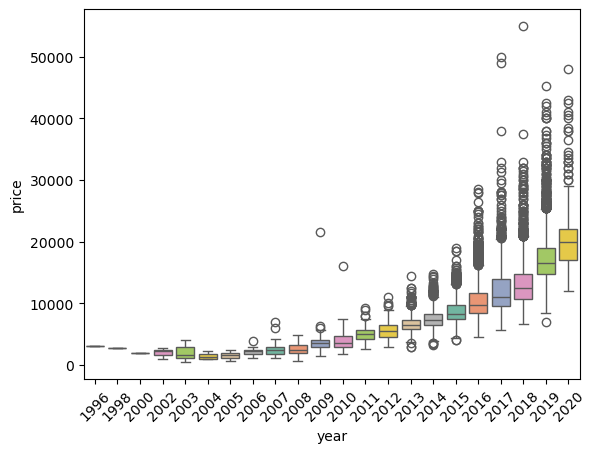

In [15]:
sns.boxplot(x = df['year'], y = df['price'],palette="Set2")
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='fuelType'>

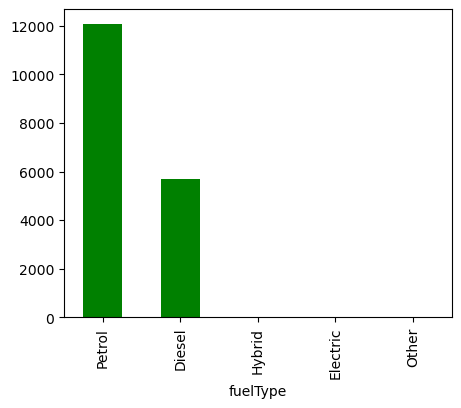

In [16]:
plt.figure(figsize=(5,4))
df['fuelType'].value_counts().plot(kind='bar',color='green')

<Axes: xlabel='mileage', ylabel='price'>

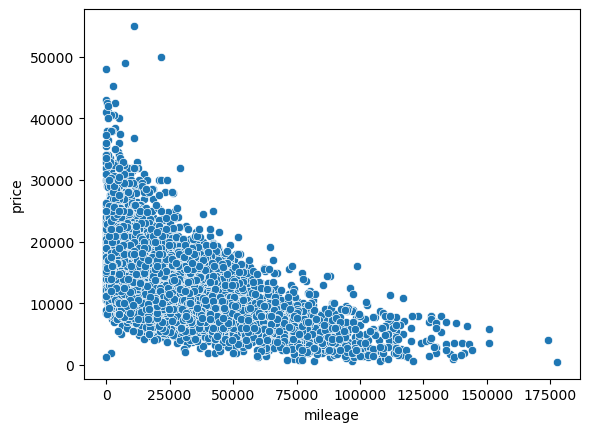

In [17]:
sns.scatterplot(x = df['mileage'],y = df['price'])

In [18]:
df = df[df['mileage'] >= 5]

In [19]:
df.shape

(17804, 9)

<Axes: xlabel='transmission', ylabel='price'>

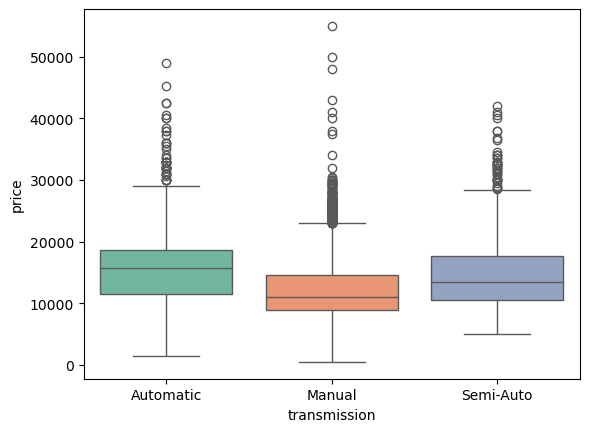

In [20]:
sns.boxplot(x = df['transmission'],y = df['price'],palette="Set2")

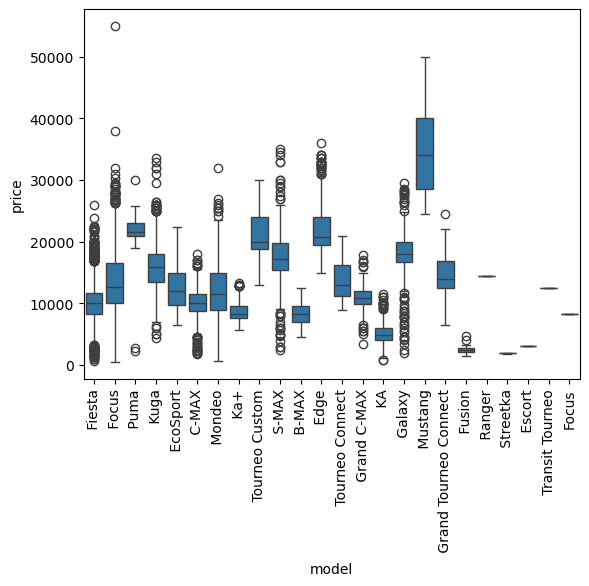

In [21]:
sns.boxplot(x = df['model'],y = df['price'])
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='mpg', ylabel='price'>

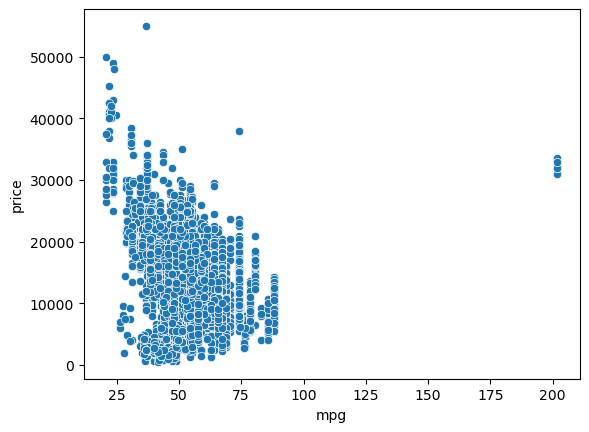

In [22]:
sns.scatterplot(x = df['mpg'], y = df['price'])

In [23]:
df = df[df['mpg'] < 100]

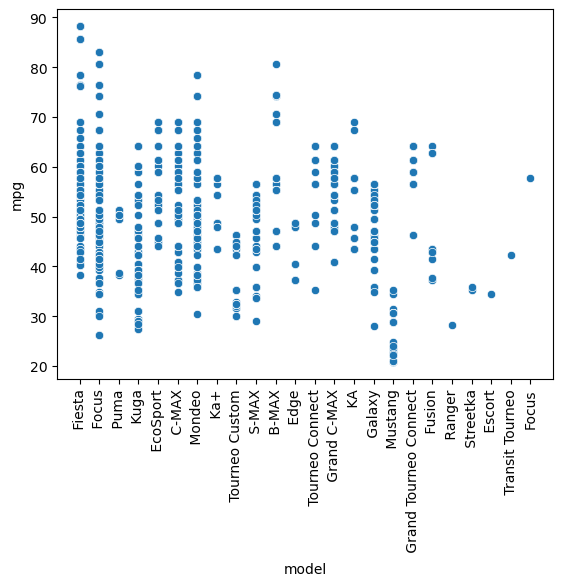

In [24]:
sns.scatterplot(x = df['model'], y = df['mpg'])
plt.xticks(rotation=90)
plt.show()

# Preprossing

In [25]:
X = df.iloc[:,:8]

In [26]:
y = df['price']

In [27]:
df.columns

Index(['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg',
       'engineSize', 'price'],
      dtype='object')

# One hot encoding

In [28]:
col = ['model','transmission','fuelType']
X_ohe = pd.get_dummies(X,columns=['model','transmission','fuelType'],drop_first=True)
X_ohe = X_ohe.astype(int)

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numaric_columns = ['year','mileage','tax','mpg','engineSize']
X_ohe[numaric_columns] = scaler.fit_transform(X_ohe[numaric_columns])

In [30]:
X_ohe.head()

,year,mileage,tax,mpg,engineSize,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,model_ Fiesta,...,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,0.069669,-0.383758,0.591712,-0.039654,-0.446536,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0.563510,-0.737142,0.591712,-0.039654,-0.446536,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.069669,-0.563411,0.591712,-0.039654,-0.446536,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,1.057352,-0.666218,0.511124,-1.767076,-0.446536,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
4,1.057352,-1.128641,0.511124,-0.954171,-0.446536,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [31]:
round(X_ohe.describe(),2)

,year,mileage,tax,mpg,engineSize,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,model_ Fiesta,...,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
count,17799.00,17799.00,17799.00,17799.00,17799.00,17799.00,17799.00,17799.00,17799.00,17799.00,...,17799.00,17799.00,17799.00,17799.00,17799.00,17799.00,17799.00,17799.00,17799.00,17799.00
mean,-0.00,-0.00,-0.00,-0.00,0.00,0.03,0.06,0.01,0.00,0.37,...,0.00,0.00,0.00,0.00,0.86,0.06,0.00,0.00,0.00,0.68
std,1.00,1.00,1.00,1.00,1.00,0.17,0.24,0.11,0.01,0.48,...,0.04,0.06,0.01,0.01,0.34,0.24,0.01,0.03,0.01,0.47
min,-10.30,-1.20,-1.83,-3.80,-2.72,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,-0.42,-0.69,-1.34,-0.55,-0.45,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
50%,0.07,-0.26,0.51,0.06,-0.45,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
75%,0.56,0.40,0.51,0.77,-0.45,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
max,1.55,7.94,7.52,3.11,8.63,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

# Train test split

In [33]:
X_train , X_test , y_train , y_test = train_test_split(X_ohe,y,test_size=0.2,random_state=42)
print(X_train.shape , X_test.shape)

(14239, 34) (3560, 34)


In [34]:
y_train.shape , y_test.shape

((14239,), (3560,))

# Model traning

In [35]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [36]:
y_pred  = lr.predict(X_test)

In [37]:
r2 = r2_score(y_test,y_pred)
r2

0.8606458852524315

In [38]:
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = (1 - (1 - r2)*(n - 1) / (n - p - 1))
adjusted_r2

0.8593017604577031

# Label encoding

In [39]:
Xlabel = X.copy()
column = ['model','transmission','fuelType']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Xlabel['model'] = le.fit_transform(Xlabel[['model']])
Xlabel['transmission'] = le.fit_transform(Xlabel[['transmission']])
Xlabel['fuelType'] = le.fit_transform(Xlabel[['fuelType']])

X_train , X_test , y_train , y_test = train_test_split(Xlabel,y,test_size=0.2,random_state=42)
print(X_train.shape , X_test.shape)

lr2 = LinearRegression()
lr2.fit(X_train,y_train)

(14239, 8) (3560, 8)


LinearRegression()

In [40]:
y_pred = lr2.predict(X_test)
r2 = r2_score(y_test,y_pred)
r2

0.7609580913883462

In [41]:
Xlabel.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,5,2017,0,15944,4,150,57.7,1.0
1,6,2018,1,9083,4,150,57.7,1.0
2,6,2017,1,12456,4,150,57.7,1.0
3,5,2019,1,10460,4,145,40.3,1.5
4,5,2019,0,1482,4,145,48.7,1.0


In [68]:
# Example new input (year=2020, mileage=15000, engine_size=2.0)
new_data = np.array([[5,2017,0,15944,4,150,57.7,1.0]])

prediction = lr2.predict(new_data)
print("Predicted price:", prediction[0])

Predicted price: 11193.03256120393
